Logistic Regression-Diabetes dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [5]:
data=pd.read_csv('diabetes.csv')

In [7]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isnull().values.any()

False

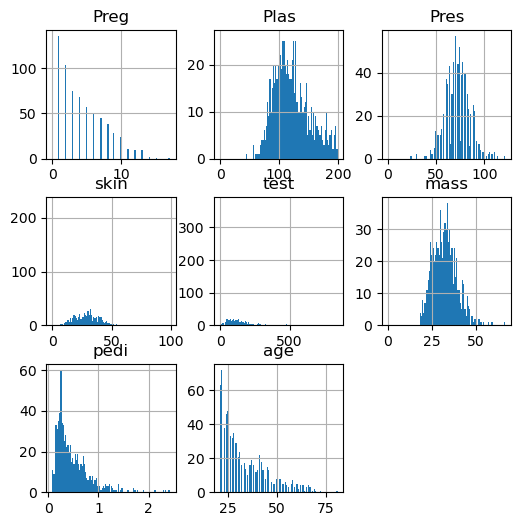

In [15]:
columns=list(data)[0:-1]
data[columns].hist(bins=100,figsize=(6,6))
plt.show()

In [17]:
data.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
n_true=len(data.loc[data['class']==True])
n_false=len(data.loc[data['class']==False])

In [21]:
print("No of Diabetic cases :{0},{1}".format(n_true,(n_true/(n_true+n_false))*100))

No of Diabetic cases :268,34.89583333333333


In [23]:
print("No of non Diabetic cases :{0},{1}".format(n_false,(n_false/(n_false+n_true))*100))

No of non Diabetic cases :500,65.10416666666666


In [25]:
x=data.drop('class',axis=1)
y=data['class']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [29]:
from sklearn.impute import SimpleImputer

In [31]:
rep_0=SimpleImputer(missing_values=0,strategy='mean')

In [33]:
cols=x_train.columns

In [35]:
x_train=pd.DataFrame(rep_0.fit_transform(x_train))
x_test=pd.DataFrame(rep_0.fit_transform(x_test))

In [37]:
x_train.columns=cols
x_test.columns=cols

In [39]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [41]:
from sklearn import metrics

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression(solver='liblinear')


In [47]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [49]:
y_predict=model.predict(x_test)

In [51]:
score=model.score(x_test,y_test)

In [53]:
print(score)

0.7792207792207793


In [55]:
cm=metrics.confusion_matrix(y_test,y_predict)

In [57]:
df=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["predict1","predict0"]])

<Axes: >

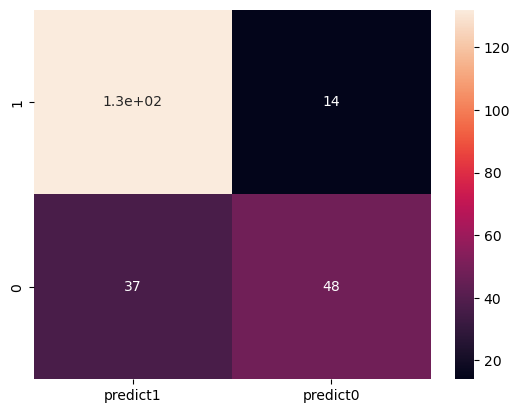

In [59]:
sns.heatmap(df,annot=True)

Naive base classifier

In [61]:
from sklearn.naive_bayes import GaussianNB

In [63]:
model_nb=GaussianNB()

In [65]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [67]:
y_predict=model_nb.predict(x_train)

In [69]:
y_predict_test=model_nb.predict(x_test)

In [71]:
print(metrics.accuracy_score(y_train,y_predict))

0.7392923649906891


In [73]:
print(metrics.accuracy_score(y_test,y_predict_test))

0.7705627705627706


In [75]:
cm=metrics.confusion_matrix(y_test,y_predict_test)

In [77]:
df=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict1","Predict0"]])

<Axes: >

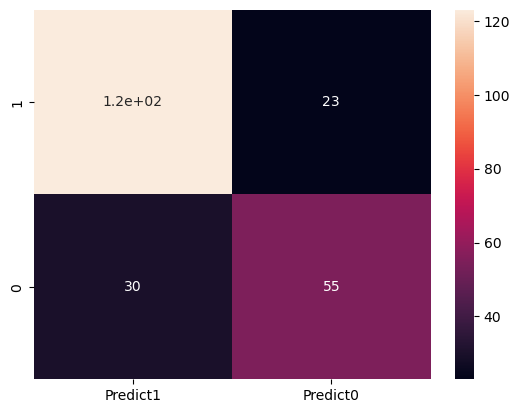

In [79]:
sns.heatmap(df,annot=True)